In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_roc_curve, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar18/sgn.csv')
df

,x,y
0,-3.141593,-0.971757
1,-3.135303,-0.991672
2,-3.129014,-1.102480
3,-3.122724,-0.930356
4,-3.116435,-0.895885
...,...,...
995,3.116435,0.941643
996,3.122724,0.985178
997,3.129014,0.952464
998,3.135303,1.004369


[0. 0.]
-0.0044526341156887386


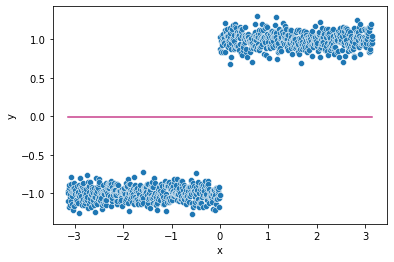

In [9]:
def rg(m):
    
    plt.tight_layout()
    sns.scatterplot(x=df['x'], y=df['y'])
    df1 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar18/sgn.csv')
    for i in range(m):
        
        df1['sin' + str(i)]=np.sin(df['x']*i)
        df1['cos' + str(i)]=np.cos(df['x']*i)
        
    X = df1.iloc[:,2:]
    y = df1['y']
    
    
    lr = LinearRegression()
    lr.fit(X,y)
    print(lr.coef_)
    print(lr.intercept_)
    
    y_pred = lr.predict(X)
    
    sns.lineplot(x=df['x'], y=y_pred, color = '#c83d8b')
    
rg(1)

[ 0.00000000e+00  2.16623594e-16  1.26491679e+00  1.52178093e-03
  2.62664126e-04  1.22063343e-03  4.25026998e-01 -6.30254496e-03
 -3.80589168e-03 -3.55254045e-03]
-0.0044550829726979855


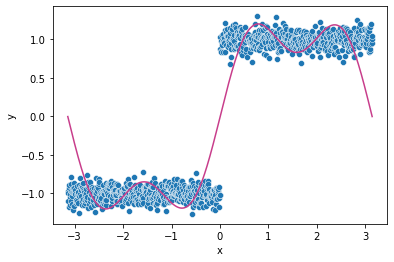

In [10]:
rg(5)

[-2.39851995e+12  1.22842539e+14  1.26803859e+00  3.75219746e-02
  2.62246082e-04 -1.40844746e-02  4.25118081e-01 -1.32592754e-02
 -3.55657415e-03 -1.01782246e-02  2.58190478e-01 -1.54052540e-03
  1.59743120e-03  5.44677540e-03  1.89628106e-01 -1.32592754e-02
 -2.63963625e-03  1.54052540e-03  1.40325475e-01 -5.44677540e-03
  1.69857299e-03  4.95009078e-03  1.22753121e-01 -2.44813408e-02
 -6.70758414e-03  5.44677540e-03  1.01307313e-01 -5.44677540e-03
 -7.71182095e-03  1.32592754e-02  8.51542754e-02 -1.54052540e-03
  5.97199950e-03  8.85634078e-03  7.75505590e-02 -4.45340615e-03
  1.38951178e-03  1.22659062e-02  7.57761552e-02 -1.32592754e-02]
-122842538951626.55


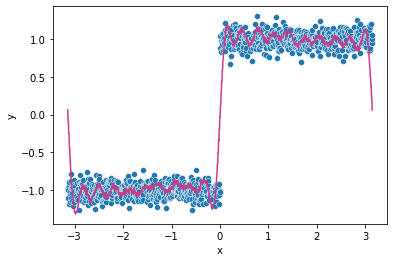

In [11]:
rg(20)

[-2.86041594e+11  2.37913662e+13  1.26831055e+00  3.51562500e-02
  2.77860744e-04  2.09980814e-03  4.24995694e-01 -9.40703369e-03
 -3.76503854e-03  1.49767431e-04  2.57351285e-01 -3.12058988e-03
  2.59151210e-03  6.40776027e-03  1.89049993e-01 -3.17923128e-03
 -1.60120541e-03 -5.40964712e-04  1.40091447e-01 -6.17171829e-03
  1.91605285e-03 -4.89724488e-03  1.22256080e-01 -8.76593496e-03
 -5.56123963e-03 -5.25789679e-03  1.00617855e-01  1.91013403e-03
 -5.35067210e-03 -9.36198060e-04  8.42720812e-02  6.73902684e-04
  7.13099035e-03  2.04611323e-03  7.43513555e-02  4.74967194e-03
  2.95401317e-03 -1.86941393e-04  7.39700751e-02 -5.44968534e-03
  2.02436596e-03  1.46847875e-03  5.94943443e-02 -6.05433278e-03
 -4.80090034e-04  5.52612824e-03  5.39056390e-02 -4.41285739e-03
  1.14725552e-03  5.25296002e-03  5.35808251e-02 -1.04217774e-03
 -5.07243014e-03 -5.07398738e-03  4.76972651e-02 -9.29975057e-04
 -7.06116586e-03  4.02144968e-03  4.74864144e-02 -1.33993910e-03
  3.39704897e-03 -4.48208

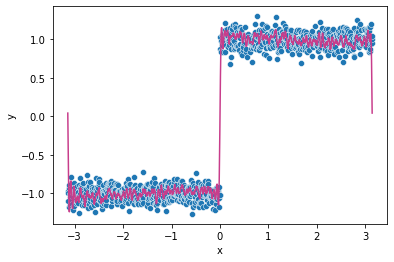

In [12]:
rg(100)

[-1.93133029e+08 -1.39363394e+08  3.64764331e+09 ... -1.19380048e+08
  7.81544533e+09  0.00000000e+00]
139363393.8881998


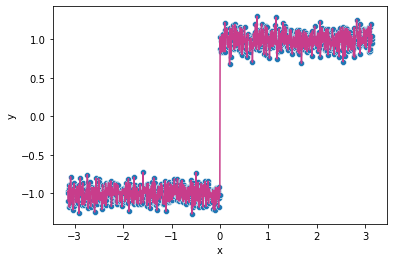

In [13]:
rg(1000)

[ 0.          0.          1.16231549 ... -0.          0.
  0.        ]
-0.004452634115688679


<AxesSubplot:xlabel='x', ylabel='y'>

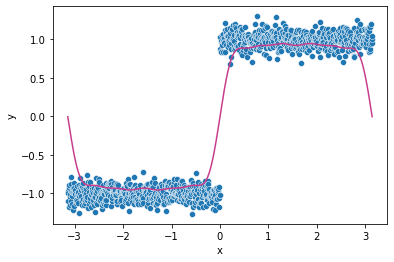

In [14]:
m = 1000
plt.tight_layout()
sns.scatterplot(x=df['x'], y=df['y'])
df1 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar18/sgn.csv')
for i in range(m):
        
    df1['sin' + str(i)]=np.sin(df['x']*i)
    df1['cos' + str(i)]=np.cos(df['x']*i)
        
X = df1.iloc[:,2:]
y = df1['y']
    
lr = LassoCV()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)
    
y_pred = lr.predict(X)
    
sns.lineplot(x=df['x'], y=y_pred, color = '#c83d8b')
